

<h1 style="text-align: left; color:Indian_red; padding: 10px; border: 5px solid Indian_red;"> 
    T.P. n°4
    <span style="float:right;"> Simulation numérique et tris - corrigé  </span>
</h1>


# 1. Cartes de champ électrostatique


L'objectif de cette première partie du TP est déterminer la carte de champ créée par une distribution de charges ponctuelles.**

#### Importations utiles

In [1]:
import numpy  as np
import matplotlib.pyplot as pl 
import random as rd
%matplotlib widget

## 1.1 Calcul du potentiel électrostatique

>**Question**  
Donner l'expression du potentiel $V(M)$ en tout point de l'espace.

>**Réponse**  
On se rappelle que le potentiel électrostatique créé par une charge ponctuelle $q$ en un point $M$ situé à une distance $r$ de la charge est :
$$V_q(M)= \frac{q}{4\pi\varepsilon_0 r}$$
où $\varepsilon_0$ est la permittivité diélectrique du vide.
Si $N$ charges $q_i$ sont placées en différents points $O_i$ de l'espace, alors on peut calculer le potentiel en un point $M$ en appliquant le théorème de superposition :
$$V(M) = \sum_{i=1}^N \frac{q_i}{4\pi \varepsilon_0 r_i}$$
où $r_i=O_iM$ est la distance entre le point $M$ et la position de la charge $q_i$.

Travaillons en deux dimensions dans un domaine $\mathcal{D}$ du plan de $100\mu m \times 100\mu m$. En tout point de ce domaine, le potentiel est caractérisé par un tableau à 2 dimensions ```V``` de 100 lignes et 100 colonnes. 


> **Question**  
Ecrire une fonction initialisant la matrice nulle NxN .

In [4]:
def initialise_matrice(N):
    return np.zeros((N,N))

V=initialise_matrice(100)


Dans notre implémentation, une charge sera représentée par une liste de 3 éléments : ```charge=[valeur_charge, ligne, colonne]```. Le premier élément donnant la valeur de la charge en coulomb et les deux suivants indiquant l'indice de la ligne et de la colonne où elle est placée.

Puis la distribution de charges sera représentée une liste des charges précédentes : ```distrib=[charge1,charge2...]```.

On donne donc ci-dessous un exemple de distribution sur lequel nous allons travailler par la suite :

In [5]:
# Cellule à exécuter

e=1.6e-19
distrib=[[-e,40,40],[2*e,60,60],[-e,60,30]]

> **Question**  
Ecrire une fonction ```visu(distrib)``` permettant de visualiser le domaine $\mathcal{D}$ de l'espace et le placement des charges sous la forme d'une image (les charges peuvent apparaître comme un point coloré sur un fond uniforme). On pourra utiliser la fonction ```imshow``` du module ```matplotlib.pyplot```.

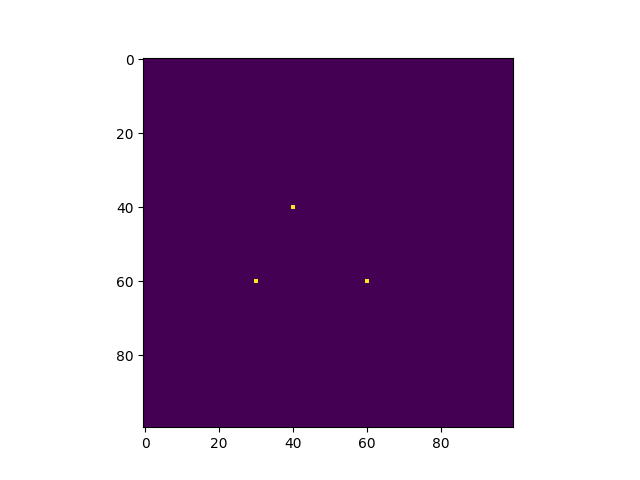

In [7]:
def visu(distrib):
    tableau=initialise_matrice(100)
    for charge in distrib :
        i,j=charge[1],charge[2]
        tableau[i,j]=1 # la présence d'une charge est matérialisée par un 1 ici
    pl.imshow(tableau)
    pl.show()
    
visu(distrib)


Pour tout point $M$ du domaine $\mathcal{D}$, il est important de pouvoir calculer la distance entre le point $M$ et une certaine charge $q_i$ : cela nous permettra d'évaluer la distance $r_i$.


>**Question**   
Écrire une fonction ```distance(charge,i,j)``` prenant pour argument une liste ```charge``` et renvoyant sa distance à la case ```[i,j]```. La tester avec ```charge=[1,2,7]```, ```i=7```, ```j=7```. On doit trouver $5$ µm.

In [12]:
def distance(charge,i,j):
    icharge=charge[1]
    jcharge=charge[2]
    d_pix=np.sqrt((i-icharge)**2+(j-jcharge)**2)
    ri=d_pix*1e-6
    return ri

distance([1,2,7],7,7)

4.9999999999999996e-06

Nous allons désormais créer une fonction ```potentiel(charge,i,j)``` prenant pour argument une liste ```charge``` et renvoyant le potentiel électrostatique créé par la charge dans la case ```[i,j]``` au voisinage de la charge.


>**Question**  
Écrire cette fonction.

In [14]:
def potentiel(charge,i,j):
    eps0=8.85e-12
    pi=3.14
    ri=distance(charge,i,j)
    return charge[0]/(4*pi*ri*eps0)

Nous allons bientôt pouvoir calculer le potentiel en tout point du domaine $\mathcal{D}$ (enfin pas exactement en tout point puisqu'on on ne peut l'évaluer là où se situent les charges). Récupérons donc les coordonnées des points où l'on ne va pas calculer le potentiel.

>**Question**  
Proposer une fonction ```position_charges```qui retourne la liste des coordonnées des charges de la distribution passée en argument. La tester avec la distribution données plus haut (aucun tri des valeurs retournées n'est attendu).


In [15]:
def position_charges(distrib):
    pass
    
# position_charges(distrib) 

In [16]:
def position_charges(distrib):
    coor_charges=[]
    for q,i,j in distrib :
        coor_charges.append([i,j])
    return coor_charges
    
position_charges(distrib) 

[[40, 40], [60, 60], [60, 30]]


>**Question**  
Compléter la fonction ```calcul_potentiel(distrib,V)``` qui calcule en tout point du tableau ```V``` (en dehors des points occupés par les charges) le potentiel créé par la distribution de charges ```distrib```. La fonction retourne le tableau ```V```complété. Afficher ensuite la carte de potentiel ainsi calculée et les équipotentielles à l'aide de la fonction ```contour``` du module ```plot```.

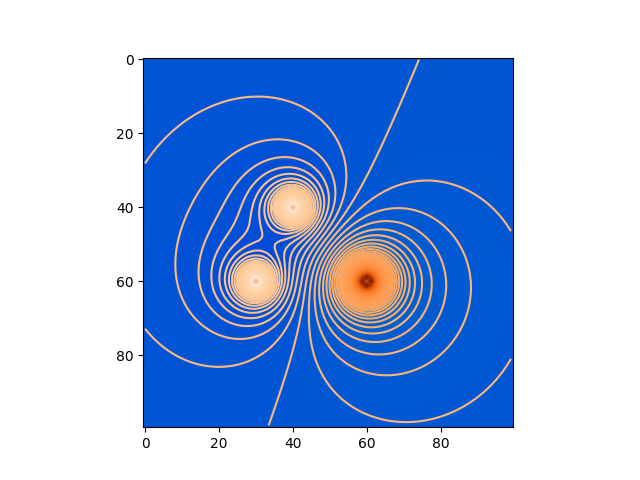

In [18]:
def calcul_potentiel(distrib,V):
    positions_charges=position_charges(distrib)
    N=100
    for i in range(N):
        for j in range(N):
            # on se place en dehors des points occupés par les charges
            if [i,j] not in positions_charges :  
                Vij=0
                for charge in distrib :
                    Vij+=potentiel(charge,i,j)
                V[i,j]=Vij
    return V

V=calcul_potentiel(distrib,V)
#print(V)

# Affichage
pl.imshow(V, cmap="winter")
pl.contour(V,200, cmap="Oranges")
pl.show()

## 1.2 Calcul du champ électrostatique

Maintenant que le potentiel est connu en tout point de l'espace, on va pouvoir calculer le champ électrostatique.


>**Question**  
Rappeler la relation liant le champ électrique et le potentiel électrique en électrostatique. De quelle équation de Maxwell découle cette propriété ? En déduire l'expression des composantes $E_x$ et $E_y$ du champ électrique en fonction du potentiel $V$.

>**Réponse**   
On applique la relation (**uniquement valable en électrostatique**) :
$$\vec{E}=-\overrightarrow{\mbox{grad}}(V)$$
C'est l'équation de Maxwell-Faraday, en régime stationnaire, qui permet l'écriture de cette relation.
Dans le plan, en notant $E_x$ et $E_y$ les composantes du champ électrique, cette relation se projette :
$$E_x=- \frac{\partial V}{\partial x}$$
$$E_y=-\frac{\partial V}{\partial y}$$

>**Question**  
Proposer une discrétisation des relation précédentes permettant d'exprimer $E_x$ et $E_y$ en fonction de valeurs pertinentes de $V_{i,j}$.

>**Réponse**
Ces relations sont approximables par méthode d'Euler :
$$E_x= - \frac{V[i,j+1]-V[i,j]}{a}$$
$$E_y = - \frac{V[i+1,j]-V[i,j]}{a}$$
où $a=1\mu m$ est la distance entre deux cases adjacentes.

> **Question**  
Écrire une fonction ```champ_e(V,i,j)``` qui détermine le champ électrique au point de coordonnées ```i,j``` de la matrice de potentiel ```V```. Cette fonction renvoie le couple de scalaires : ```Ex,Ey```. 

In [20]:
def champ_e(V,i,j):
    a=1e-6
    Ex=(V[i,j]-V[i,j+1])/a
    Ey=(V[i,j]-V[i+1,j])/a
    return Ex,Ey

> **Question**  
Au sein d'une fonction ```calcul_champ_e(V,distrib)```, appliquer la fonction précédente en tout point pertinent. La fonction ```calcul_champ_e``` doit renvoyer deux matrices ```EEx``` et ```EEy``` (composantes du champ électrique selon x et y, évaluées en tout point du domaine D.)

In [22]:
def calcul_champ_e(V,distrib):
    N=100
    EEx=np.zeros((N,N))
    EEy=np.zeros((N,N))
    # Mise à jour des valeurs de potentiel
    positions_charges=position_charges(distrib)
    # Détermination de la carte des champ
    for i in range(N-1):
        for j in range(N-1):
            if ([i,j] not in positions_charges) and ([i,j+1] not in positions_charges) and ([i+1,j] not in positions_charges):
                EEx[i,j],EEy[i,j]=champ_e(V,i,j)
    return EEx,EEy

EEx,EEy=calcul_champ_e(V,distrib)

Le code écrit ci-dessous permet d'afficher la carte de potentiel, les équipotentielles et les lignes de champ du champ électrique. On peut vérifier la cohérence du résultat : le champ électrique diverge bien des charges positives pour converger vers les charges négatives.

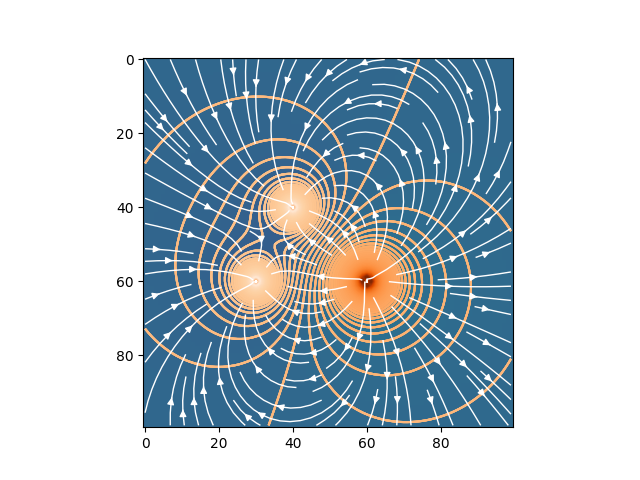

In [26]:
# Cellule à exécuter pour l'affichage

pl.rcParams['figure.figsize']=[9,9]

pl.imshow(V)
pl.contour(V,200, cmap="Oranges")
pl.streamplot(np.linspace(0,99,100), np.linspace(0,99,100), EEx, EEy, color="white", linewidth=1)  
pl.show()

Cette représentation présente l'inconvénient de fournir peu d'informations sur la norme du champ électrique. À l'aide de l'argument ```linewidth``` de la fonction ```streamplot``` nous allons faire en sorte que la ligne de champ électrique soit d'autant plus épaisse que la norme du champ électrique est élevée.

On rappelle que ```EEx``` et ```EEy``` sont des tableaux ```numpy```, ce qui simplifie la syntaxe des calculs.

> **Question**   
Créer le tableau ```norm_e``` de même dimension que ```EEx``` et ```EEy``` et donnant la norme du champ électrique en tout point. Déterminer ensuite le maximum ```Emax``` de la norme du champ électrique dans le domaine d'étude. On posera ensuite ```lw=norm_e/Emax``` et on ré-exécutera la fonction ```streamplot``` avec ```linewidth=75*lw```.

In [29]:
norm_e=np.sqrt(EEx**2+EEy**2)
Emax=np.ndarray.max(norm_e)
lw=norm_e/Emax

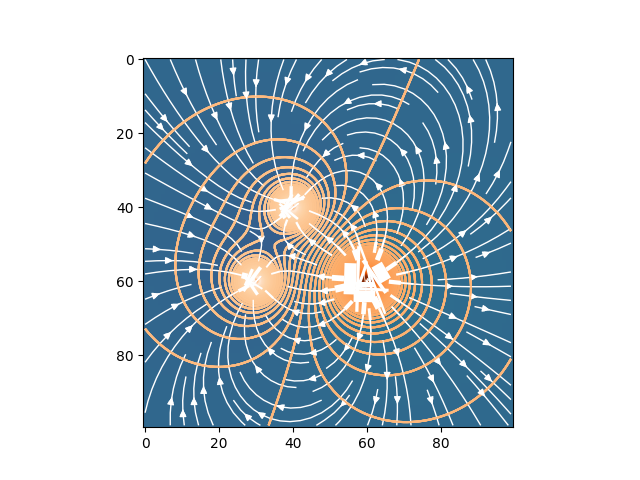

In [30]:
# Affichage de la figure
pl.imshow(V)
pl.contour(V,200, cmap="Oranges")
pl.streamplot(np.linspace(0,99,100), np.linspace(0,99,100), EEx, EEy, color="white", linewidth=75*lw, arrowsize=1) 
pl.show()

**Pour aller plus loin :**

L'image précédente n'est pas très belle au voisinage des charges car le champ électrique y varie rapidement, et on observe alors des discontinuités de la largeur des lignes de champ.

Il faudrait en faite "lisser" les variations rapides au sein du tableau ```lw```. Cette méthode est analogue à certains filtres créant du "flou" en traitement d'image. Ceux-ci étant déjà codés dans ```scipy```, on en profite et, avec un filtre dit "gaussien", on obtient le résultat suivant :

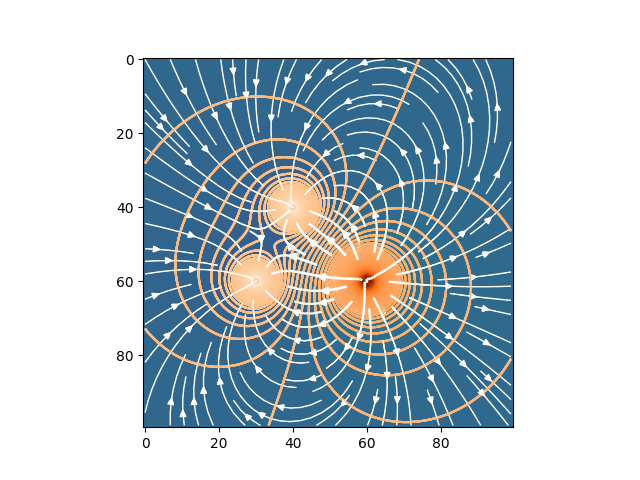

In [31]:
from scipy import misc,ndimage
lw_lisse= ndimage.gaussian_filter(lw, sigma=15)

pl.imshow(V)
pl.contour(V,200, cmap="Oranges")
pl.streamplot(np.linspace(0,99,100), np.linspace(0,99,100), EEx, EEy, color="white", linewidth=75*lw_lisse, arrowsize=1)
pl.show()

Il reste encore le problème des "effets de bord" du domaine. Il faudrait par exemple que les charges soient plus éloignées des bordures de $\mathcal{D}$. La solution la plus simple dans un premier temps serait d'agrandir le domaine... au prix d'un coût en temps de calcul.

# 2. Quelques mots sur les tris

## 2.1 Construction d'un dictionnaire ... avec des dictionnaires

Le tri radix (ou tri par base) est un tri lexicographique qui permet de trier des éléments en comparant, position après position, tous leurs sous-éléments de ceux-ci. 

Le principe du tri radix appliqué aux chaînes de caractères est le suivant :
- donner une taille commune à tous les mots ;
- trier avec un tri stable les différents caractères, dans l’ordre inverse du mot
- reconstituer les mots.


On rappelle qu'un tri stable garde l’ordonnancement des termes considérés comme égaux. Si le tri utilisé n’était pas stable, on perdrait l'ordre des dernières lettres précédemment obtenu.

On propose de réaliser un tri stable selon la technique du dénombrement. Nous allons l’adapter au cas traité où l’on doit trier des listes selon l’un de leurs éléments.

Soit `ell` une liste de mots (représentés par des chaînes de caractères alphabétiques minuscules).

>**Question**  
Écrire une fonction `mots_longueur_egale(ell)` qui retourne une liste de mots ayant tous la même taille (en rajoutant éventuellement le caractère '0').
 

In [2]:
def mots_longueur_egale(ell:list)->list:
    l_max=0
    # détermination de la longueur max des mots
    for mot in ell:
        if len(mot)>l_max:
            l_max=len(mot)
    l=[]
    for mot in ell:
        l.append(mot+(l_max-len(mot))*'0')
    return l

ell=['train','avion','voiture','bus','autobus','autocar','bicyclette', 'velo','bateau','automobile',]
l=mots_longueur_egale(ell)
l

['train00000',
 'avion00000',
 'voiture000',
 'bus0000000',
 'autobus000',
 'autocar000',
 'bicyclette',
 'velo000000',
 'bateau0000',
 'automobile']

>**Question**  
Définir un dictionnaire `alph` qui réalise l'association suivante : `{'a':0,'b':1, ...  ,'z':25,'0':26}` (ne pas hésiter à consulter l'aide ci-dessous).

In [4]:
alph={chr(i+97):i for i in range(26)}
alph['0']=26
alph

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '0': 26}

On considère maintenant que $\ell$ est une liste de mots de même taille sur le modèle suivant : `l=["velo0","train","avion]`. 

On souhaite mettre en place une fonction `etape(l,i,alph)` capable de renvoyer une liste des mots de `l` triés selon leur élément d’indice $i$, soit `l[i]`. La méthode est la suivante :
 
1. créer une liste `l_d` (dénombrement) de listes vides de taille `len(alph)` ;
2. Pour chaque mot `mot` de `l`, ajouter cet élément dans `l_d` à la position `j` associée à la lettre lue ;
3. reconstruire la liste `l` triée en prenant dans l’ordre, les éléments de `l_d`.

>**Question**  
Créer une fonction `etape(l,i,alph)` qui applique la méthode qui vient d'être définie. 



In [40]:
def etape(l:list,i:int,alph:dict)->list:
    l_d=[[] for _ in range(len(alph))]
    for el in l:
        j=alph[el[i]]
        l_d[j].append(el)
    l=[]
    for el in l_d:
        if el!=[]:
            l+=[el1 for el1 in el]
    return l

etape(l,0,alph)


['avion00000',
 'autobus000',
 'autocar000',
 'automobile',
 'bus0000000',
 'bicyclette',
 'bateau0000',
 'train00000',
 'voiture000',
 'velo000000']

>**Question**  
Déterminer la complexité en temps de la fonction `etape(l,i,alph)`.

>***Réponse***  
Notons $n_l$ le nombre d'éléments de la liste et $n_m$ le nombre de caractères du mot le plus long.
Rappelons-nous par ailleurs que l'accès ou la recherche des éléments d'un dictionnaire se fait à coût constant.
La boucle impérative des lignes 3 à 5 comporte $\mathcal{O}(n_l)$ opérations de coût constant.
La liste `l_D` ayant une longueur $n_l$, la boucle suivante réalise $n_l$ de coût maximal $n_m$.
La fonction est donc de complexité $\mathcal{O}(n_l \times n_m)$.

>**Question**  
Créer une fonction `tri_radix(l)` qui réalise ce tri.
       

La fonction `mots_longueur_propre(l)` permet de recomposer les mots de la liste d'origine en supprimant les 0 qui avaient été rajoutés pour ajuster les différentes longueurs.

In [43]:
def mots_longueur_propre(l:list)->list:
    l1=[]
    for mot in l:
        i=0
        while i<len(mot) and mot[i]!='0' :
            i+=1
        l1.append(mot[:i])
    return l1
        
mots_longueur_propre(ell)

['train',
 'avion',
 'voiture',
 'bus',
 'autobus',
 'autocar',
 'bicyclette',
 'velo',
 'bateau',
 'automobile']

On peut ensuite appliquer appliquer le tri_radix selon le principe introduit, en rétablissant les mots dans leur bonne orthographe en fin de boucle.

In [52]:
def tri_radix(l:list)->list:
    # ajustement de la taille des mots
    l=mots_longueur_egale(l)
    for i in range(len(l)):
        l=etape(l,len(l)-i-1,alph)
    return mots_longueur_propre(l)

tri_radix(ell)

['autobus',
 'autocar',
 'automobile',
 'avion',
 'bateau',
 'bicyclette',
 'bus',
 'train',
 'velo',
 'voiture']

>**Question**
Déterminer la complexité de ce tri.

>***Réponse***  
En utilisant les notations précédentes, la fonction `mots_longueur_propre` a une complexité au pire en $\mathscr{O}(n_l\times n_m)$, tandis que la boucle de la ligne 15 réalise $n_l$ appels à la fonction `etape` de complexité $\mathscr{O}(n_l\times n_m)$, ce qui donne un algorithme quadratique de coût $\mathscr{O}(n_l^2\times n_m)$

##  2.2 Optimisation du tri par insertion

Imaginé par Donald Shell en 1959, le tri de Shell est une optimisation du tri par insertion.
Dans le tri par insertion, un élément se rapproche de sa place finale en progressant lentement, case par case. En revanche, dans le cas d'une liste presque triée, la méthode est globalement très efficace. L'accélération consiste à déplacer les éléments en commençant par faire des grands pas, puis des pas de plus en plus petits, jusqu'à, évidemment, des pas de 1 pour que le tableau soit trié.

On considère une suite d'entiers $\left(h_{p}\right)_{p \in N ^{*}}$ strictement croissante, débutant par $h_{1}=1$. Pour tout $n \in N ^{*}$, il existe donc un unique entier $p \in N ^{*}$ tel que $h_{p} \leqslant n<h_{p+1}$.


L'étape de base de l'algorithme consiste à trier a l'aide du tri par insertion chacun des sous-tableaux débutant respectivement par $a_{0}, \ldots, a_{h_{p}-1}$, et dont les éléments sont séparés de $h_{p}$ cases. Une fois cette étape achevée, on dit que le tableau initial est $h_{p}$-trié. On répète alors cette opération de base avec la valeur $h_{p-1}$, et ce jusqu'à la valeur finale $1 .$

Dans un premier temps on suppose $h_{p}=2^{p}$, et on note $C (n)$ le nombre maximal d'échanges effectué par l'algorithme de Shell pour trier un tableau de longueur $n$.

Après le 2-tri, les éléments du tableau vérifient : $a_{0} \leqslant a_{2} \leqslant a_{4} \leqslant \cdots$ et $a_{1} \leqslant a_{3} \leqslant a_{5} \leqslant \cdots$. 

> **Question**  
Quel est le nombre maximal d'échanges effectués par le 1-tri (c'est à dire le tri par insertion du tableau ainsi préparé) ?

> ***Réponse***  
Lors du tri par insertion d'un tableau déjà 2-trié, le nombre maximal d'échanges est obtenu lorsque les termes d'indices impairs sont tous inférieurs aux termes d'indices pairs. Dans cette situation, le nombre d'échanges effectués est égal à $1+2+\cdots+\left\lceil\frac{n}{2}\right\rceil=\frac{p(p+1)}{2}$ avec $p=\left\lceil\frac{n}{2}\right\rceil$.   
Le tableau trié prend alors la forme : $\left(a_{1}, a_{3}, a_{5}, \ldots, a_{0}, a_{2}, a_{4}, \ldots\right)$.


> **Question**   
En déduire un exemple de tableau à 4 cases pour lequel le nombre d'échanges par l'algorithme de Shell est maximal, puis un exemple avec un tableau à 8 cases.

> ***Réponse***  
Partons d'un tableau trié, par exemple $(1,2,3,4)$. Pour que le nombre d'échanges par le 1-tri soit maximal, il faut qu'à l'étape précédente on soit en présence du tableau $(3,1,4,2)$. De même, pour que le nombre d'échanges par le 2-tri soit maximal, il faut qu'à l'étape précédente on soit en présence du tableau $(4,2,3,1)$.   
Ce dernier tableau nécessite donc 5 échanges pour être trié par le tri de Shell : à la première éta pe (le 2-tri), 2 échanges le transforment en $(3,1,4,2)$, à la seconde étape (le 1-tri), 3 échanges en transforment en $(1,2,3,4)$.   
C'est la même chose pour $n=8$ en partant de $(1,2,3,4,5,6,7,8)$. Avant le 1 -tri, il faut avoir $(5,1,6,2,7,3,8,4)$, avant le 2-tri, $(7,3,5,1,8,4,6,2)$, et avant le 4-tri, $(8,4,6,2,7,3,5,1)$. Avec ce dernier tableau, le tri de Shell effectue 20 échanges.





> **Question**  
On note $u_{p}= C \left(2^{p}\right)$. Montrer que $u_{p}=2 u_{p-1}+2^{p-2}\left(2^{p-1}+1\right)$, et en déduire une forme close de $u_{p}$. Le choix pour la suite $\left(h_{p}\right)_{p \in N ^{*}}$ est-il pertinent?

> ***Réponse***  
Le tri de Shell étudié ici revient à trier récursivement les termes pairs et impairs séparément puis à appliquer le 1-tri (le tri par insertion) au tableau obtenu. D'après la première question, le nombre maximal d'échanges effectués vérifie la relation : 
$$C\left(2^{p}\right)=2 C\left(2^{p-1}\right)+\frac{2^{p-1}\left(2^{p-1}+1\right)}{2}$$
soit : $$u_{p}=2 u_{p-1}+2^{p-2}\left(2^{p-1}+1\right)$$  
Écrivons : $\dfrac{u_{p}}{2^{p}}=\dfrac{u_{p-1}}{2^{p-1}}+\dfrac{2^{p-1}+1}{4}$ de manière à réaliser un télescopage. Sachant que $u_{0}=0$ on obtient : 
$$u_{p}=2^{p} \sum_{k=0}^{p-1} \frac{2^{k}+1}{4}=2^{p-2}\left(2^{p}-1+p\right)=\frac{2^{p}\left(2^{p}-1\right)}{4}+p 2^{p-2} $$  
Lorsque $n=2^{p}$, le nombre d'échanges effectués est égal dans le pire des cas à $\frac{n(n-1)}{4}+\frac{n \log n}{4}$. Le coût reste quadratique, mais asymptotiquement le nombre d'échanges est deux fois moindre que pour le tri par insertion. Cela n'en reste pas moins mauvais, et d'autres choix pour la suite $h_{p}$ conduisent à de meilleurs résultats. Par exemple, la suite définie par $h_{p}=2^{p}-1$ conduit à un coût dans la pire des cas en $\mathcal{O}\left(n^{3 / 2}\right)$ (Hibbard, 1963). Mieux, la suite des nombres de la forme $2^{a} 3^{b}$ conduit à un coût en $\mathcal{O}\left(n \log ^{2} n\right)$ (Pratt, 1971). Mais la recherche de la meilleure suite de valeurs pour $h_{p}$ reste à l'heure actuelle un problème ouvert.

> **Question**  
Hibbard a démontré en 1963 que la suite $h_{p}=2^{p}-1$ conduit à un coût en $\mathcal{O}\left(n^{3 / 2}\right)$. Programmer en Python le tri de Shell pour cette suite de valeurs.

>***Réponse***  
On écrit tout d’abord une fonction insertion qui réalise le h-tri d’un tableau.


In [54]:
def insertion(t, h):
    for j in range(h, len(t)):
        k = j
        while k >= h and t[k] < t[k-h]:
            t[k-h], t[k] = t[k], t[k-h]
            k -= 1

> Le tri proprement dit consiste essentiellement à calculer la plus grande valeur $h_{p}$ de la suite qui vérifie $h_{p} \leqslant n<h_{p+1}$ puis à appliquer la fonction précédente avec $h_{p}, h_{p-1}, \ldots, h_{1}=1$.

In [55]:
def tri_shell(t):
    h = 1
    while 2 * h + 1 < len(t):
        h = 2 * h + 1
    while h > 0:
        insertion(t, h)
        h = (h - 1) // 2

In [56]:
# Vérification visuelle de la correction du tri
l=[rd.randint(1,10**4) for _ in range(20)]
tri_shell(l)
print(l)

[22, 542, 720, 998, 2864, 3659, 3972, 5738, 6640, 6983, 7048, 7279, 7529, 7536, 7544, 8091, 8110, 8428, 8615, 8878]


Pour rendre un peu plus robuste la vérification du tri, on peut générer un certain nombre de listes de tailles aléatoires, et comparer le résultat du tri avec celui fourni par une méthode codée dans Python.

In [57]:
# nombre de liste testées
N=10
for _ in range(N):
    # taille de la liste
    n_l = rd.randint(10**2,10**4)
    # construction de la liste
    l=[rd.randint(0,10**6) for i in range(n_l)]
    l1=sorted(l)
    tri_shell(l)
    assert(l==l1)
   


*Remarque :*   
Connaître la suite $\left(h_{p}\right)$ conduisant à la meilleure complexité de ce tri est à l'heure actuelle un problème ouvert. Des considérations empiriques conduisent à penser que ses premiers termes sont $1,4,10,23$, $57,132,301,701$ et conduisent à suggérer une croissance géométrique de l'ordre de 2,2 .